# Shell Scripting/Data Gathering

In [13]:
# imports
import subprocess
import time
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean

In [ ]:
# cuda script runner
def scriptRunner(n):
    # Replace with desired compiled program path from root to run
    binaryFilePath = "./file_path_here"
    cmd = f"echo " + str(n) + " | " + binaryFilePath
    res = subprocess.run(cmd, capture_output=True, text=True, shell=True)
    
    data = res.stdout.split('\n')[0:2]

    return [n, [int(n) for n in data]]

In [27]:
# Generate Data
maxN = 100
granularity = 50
nums = [n * (maxN // granularity) for n in range(granularity, 0, -1)]

data = []

for n in nums:
    data.append(scriptRunner(n))

print(data)

[[100, [4950, 192]], [98, [4753, 192]], [96, [4560, 175]], [94, [4371, 183]], [92, [4186, 269]], [90, [4005, 190]], [88, [3828, 239]], [86, [3655, 229]], [84, [3486, 201]], [82, [3321, 174]], [80, [3160, 212]], [78, [3003, 183]], [76, [2850, 190]], [74, [2701, 241]], [72, [2556, 225]], [70, [2415, 182]], [68, [2278, 286]], [66, [2145, 206]], [64, [2016, 194]], [62, [1891, 213]], [60, [1770, 228]], [58, [1653, 222]], [56, [1540, 217]], [54, [1431, 182]], [52, [1326, 175]], [50, [1225, 169]], [48, [1128, 178]], [46, [1035, 229]], [44, [946, 227]], [42, [861, 218]], [40, [780, 233]], [38, [703, 188]], [36, [630, 242]], [34, [561, 173]], [32, [496, 274]], [30, [435, 175]], [28, [378, 208]], [26, [325, 241]], [24, [276, 173]], [22, [231, 178]], [20, [190, 232]], [18, [153, 213]], [16, [120, 212]], [14, [91, 188]], [12, [66, 183]], [10, [45, 247]], [8, [28, 229]], [6, [15, 173]], [4, [6, 177]], [2, [1, 386]]]


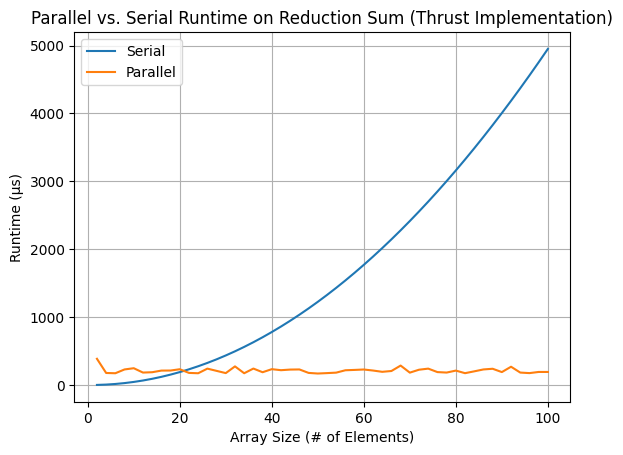

In [28]:
# Plot Data

x = [l[0] for l in data]
y = [l[1] for l in data]

fig, ax = plt.subplots()
ax.plot(x, y)

# TODO: Replace xlabel and ylabel with applicable labels
ax.set(xlabel='Array Size (# of Elements)', ylabel='Runtime (µs)',
       title='Parallel vs. Serial Runtime on Reduction Sum (Thrust Implementation)')
ax.grid()

plt.legend(["Serial", "Parallel"])

fig.savefig("./Runtime Plots/pr_thrust_runtime_plot_max_2k.png")
plt.show()